In [1]:
# Necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import FuncFormatter
from plotly.offline import plot

In [2]:
# Load data set
df = pd.read_excel('summarized_project_3.xlsx')
df

Produkttyp  Year  Month              Produkttyp Name  \
0             1  2020      1  Wi-Fi Smelly Socks Detector   
1             1  2020      2  Wi-Fi Smelly Socks Detector   
2             1  2020      3  Wi-Fi Smelly Socks Detector   
3             1  2020      4  Wi-Fi Smelly Socks Detector   
4             1  2020      5  Wi-Fi Smelly Socks Detector   
..          ...   ...    ...                          ...   
355          10  2022      8                CheeseStation   
356          10  2022      9                CheeseStation   
357          10  2022     10                CheeseStation   
358          10  2022     11                CheeseStation   
359          10  2022     12                CheeseStation   

     Produzierte Einheiten  Arbeitskosten  Materialkosten  Overhead  \
0                     3234          53859            4745      6421   
1                     2360          40100            3689      3954   
2                     7168         129729            8898     25794   
3                     5420         108424            6906     18838   
4                     2019          27118            2641       424   
..                     ...            ...             ...       ...   
355                    327           5916            4913       689   
356                    154           3432            2508      1001   
357                    251           6906            3455      2722   
358                    376          10086            5551      2413   
359                    328           7281            4978      1504   

     Energiekosten  Zielgewinnspanne  Gesamtkosten  \
0            12913              0.69         77938   
1            10156              0.69         57899   
2            10738              0.69        175159   
3             7840              0.69        142008   
4            16035              0.69         46218   
..             ...               ...           ...   
355           2939              0.97         14457   
356            979              0.97          7920   
357              0              0.97         13083   
358           2451              0.97         20501   
359           2656              0.97         16419   

     Durchschnittliche Kosten pro Einheit  Erforderlicher Verkaufspreis  \
0                               24.099567                     77.740539   
1                               24.533475                     79.140241   
2                               24.436244                     78.826595   
3                               26.200738                     84.518510   
4                               22.891530                     73.843647   
..                                    ...                           ...   
355                             44.211009                   1473.700306   
356                             51.428571                   1714.285714   
357                             52.123506                   1737.450199   
358                             54.523936                   1817.464539   
359                             50.057927                   1668.597561   

     Bruttogewinnspanne  Gesamtbruttogewinn  Gesamtnettogewinn  
0                  0.69           173474.90           95536.90  
1                  0.69           128871.97           70972.97  
2                  0.69           389870.03          214711.03  
3                  0.69           316082.32          174074.32  
4                  0.69           102872.32           56654.32  
..                  ...                 ...                ...  
355                0.97           467443.00          452986.00  
356                0.97           256080.00          248160.00  
357                0.97           423017.00          409934.00  
358                0.97           662865.67          642364.67  
359                0.97           530881.00          514462.00  

[360 rows x 16 columns]

In [3]:
# Load dataset Products Types
products_infos = pd.read_excel('C:\\Users\\User\\Desktop\\Data Analyst\\Aufgaben\\Visualisirung_Project\\project\\Project_3_Electro\\Praxisaufgabe - Zielgewinnspanne.xlsx')
products_infos

Produkttyp                      Produkttyp Name  Zielgewinnspanne
0           1          Wi-Fi Smelly Socks Detector              0.69
1           2               Bluetooth Banana Phone              0.41
2           3    Virtual Reality Nose Hair Trimmer              0.51
3           4                 Robotic Pizza Butler              0.46
4           5                       Selfie Toaster              0.41
5           6  Electric Toothbrush Karaoke Machine              0.07
6           7             Solar-Powered Rain Cloud              0.88
7           8              Quantum Potato Computer              0.91
8           9                            BananaBox              0.69
9          10                        CheeseStation              0.97

### Timeline Story

In [4]:
# Create currency formatter

# Normal format
def currency_formatter(x, pos):   
    return f'{x:,.0f}'

# Millions format
def currency_formatter_milion(x, pos):
    return f'{int(x/1e6):,.0f} M'   

# Euro format
def currency_formatter_euro(x, pos):
    return f'{x:,.0f} €'

In [5]:
# Group by Year - Month - Name aggregation with Gesamtbruttogewinn

product_date = df.groupby(['Year', 'Month', 'Produkttyp Name'])['Gesamtbruttogewinn'].sum().reset_index()

# Convert Year and Month columns to datetime format
product_date['Date'] = pd.to_datetime(product_date[['Year', 'Month']].assign(day=1))
product_date

Year  Month                      Produkttyp Name  Gesamtbruttogewinn  \
0    2020      1                            BananaBox             7710.19   
1    2020      1               Bluetooth Banana Phone           100272.10   
2    2020      1                        CheeseStation          1038870.00   
3    2020      1  Electric Toothbrush Karaoke Machine             6412.38   
4    2020      1              Quantum Potato Computer           219542.56   
..    ...    ...                                  ...                 ...   
355  2022     12                 Robotic Pizza Butler            32808.22   
356  2022     12                       Selfie Toaster            69892.49   
357  2022     12             Solar-Powered Rain Cloud           533419.33   
358  2022     12    Virtual Reality Nose Hair Trimmer           156262.96   
359  2022     12          Wi-Fi Smelly Socks Detector           212811.58   

          Date  
0   2020-01-01  
1   2020-01-01  
2   2020-01-01  
3   2020-01-01  
4   2020-01-01  
..         ...  
355 2022-12-01  
356 2022-12-01  
357 2022-12-01  
358 2022-12-01  
359 2022-12-01  

[360 rows x 5 columns]

In [6]:
products_list = products_infos['Produkttyp Name'].to_list()
products_list

['Wi-Fi Smelly Socks Detector',
 'Bluetooth Banana Phone',
 'Virtual Reality Nose Hair Trimmer',
 'Robotic Pizza Butler',
 'Selfie Toaster',
 'Electric Toothbrush Karaoke Machine',
 'Solar-Powered Rain Cloud',
 'Quantum Potato Computer',
 'BananaBox',
 'CheeseStation']

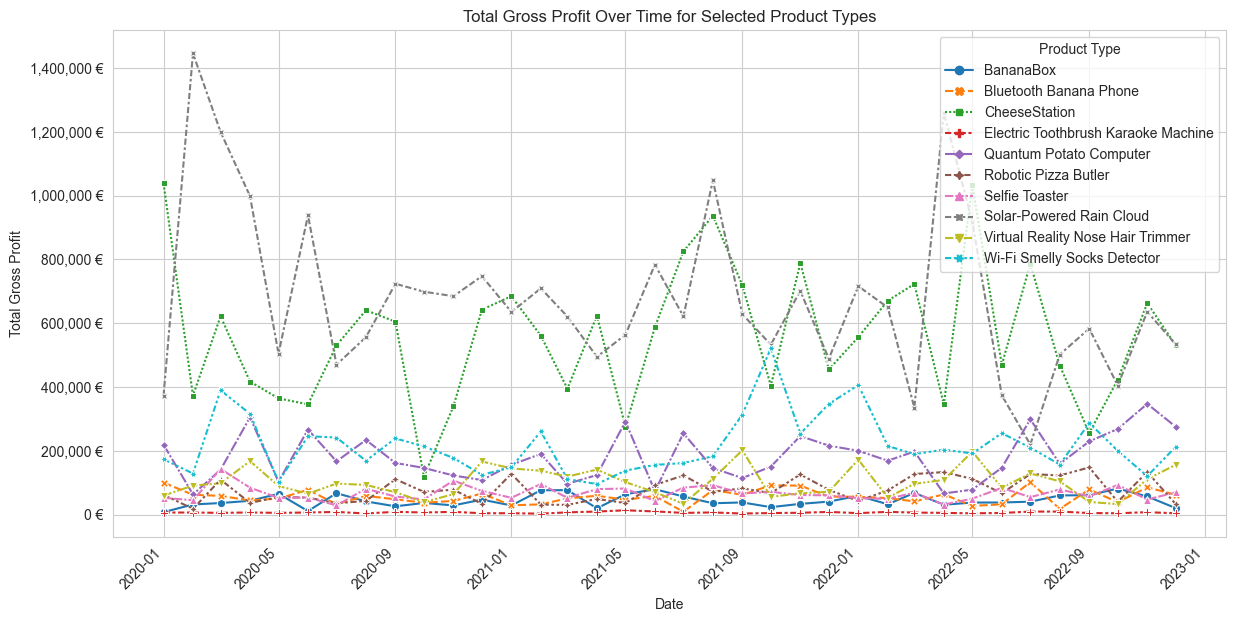

In [7]:
# Plot the line graph for all products

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=product_date, x='Date', y='Gesamtbruttogewinn', hue='Produkttyp Name', style='Produkttyp Name', markers=True)

plt.title('Total Gross Profit Over Time for Selected Product Types')
plt.xlabel('Date')
plt.ylabel('Total Gross Profit')
plt.legend(title='Product Type')
plt.tight_layout()

ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter_euro))

plt.xticks(rotation=45, ha='right')

plt.show()
#plt.savefig('plot_3\\plot1.png')

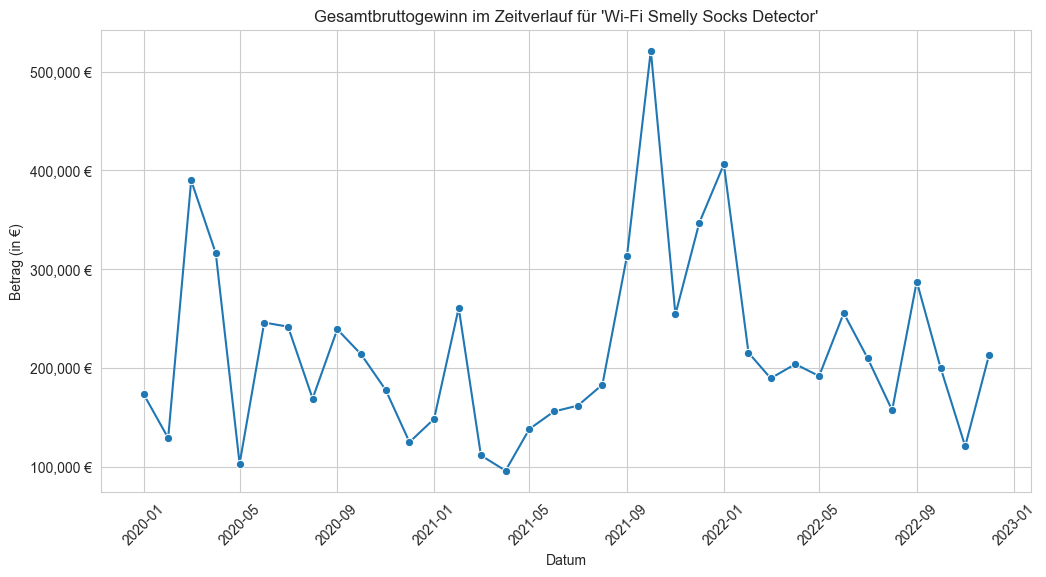

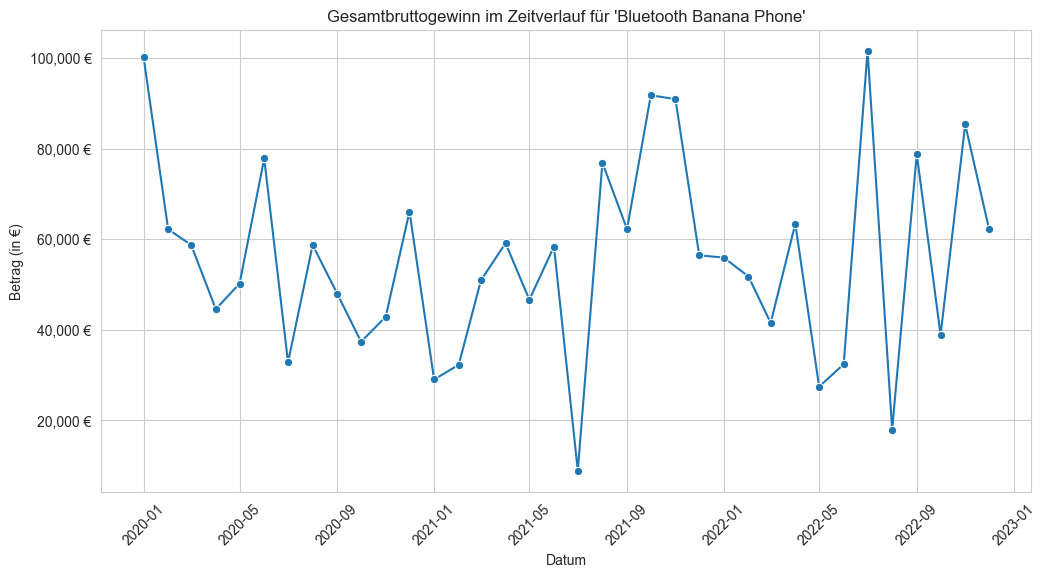

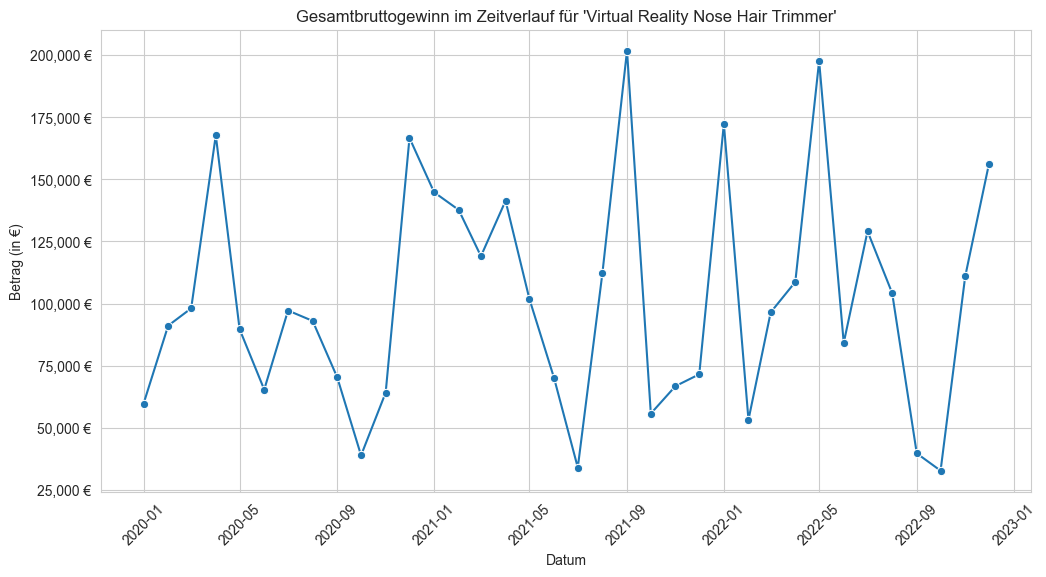

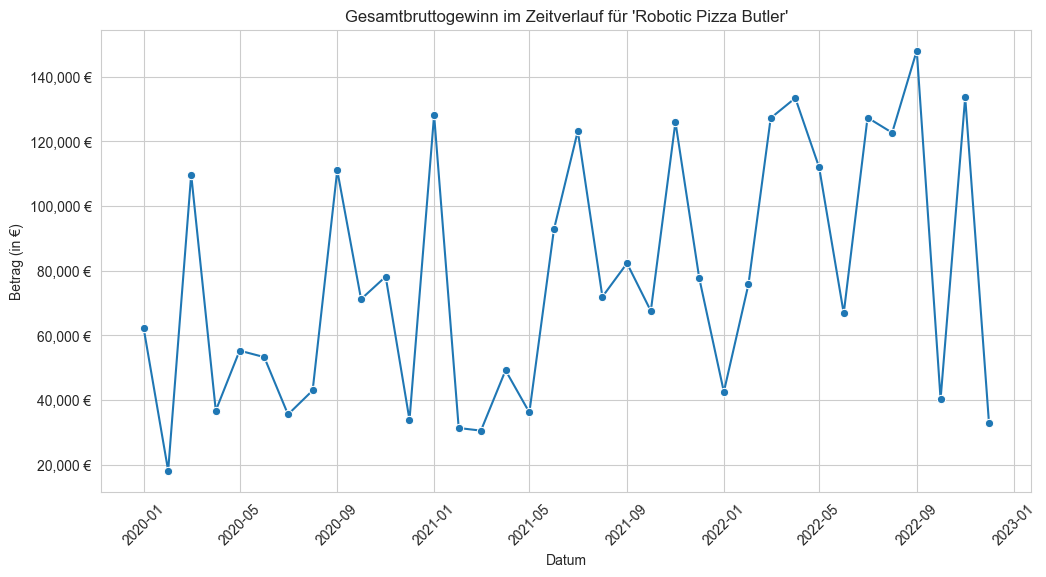

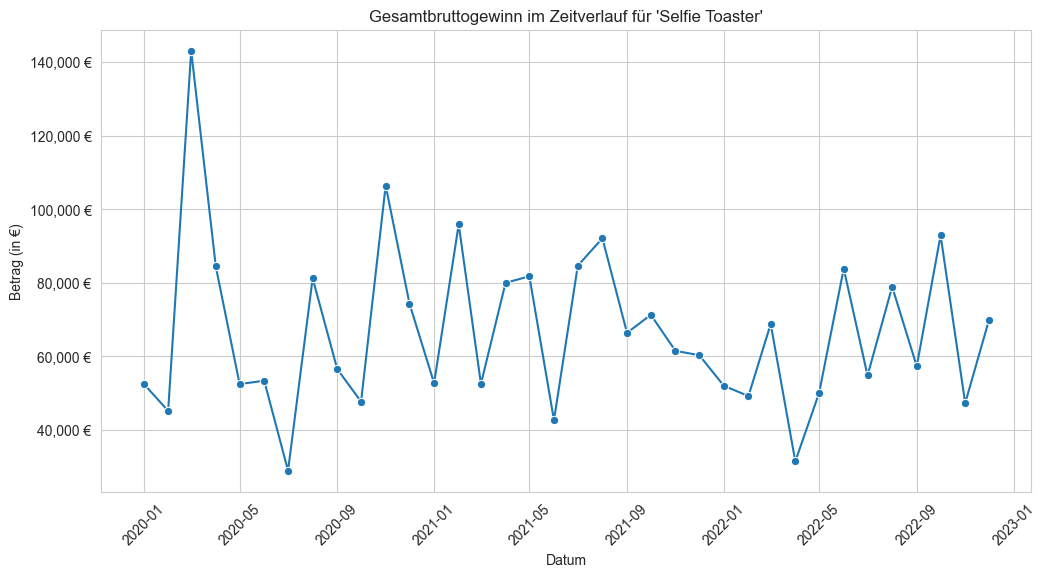

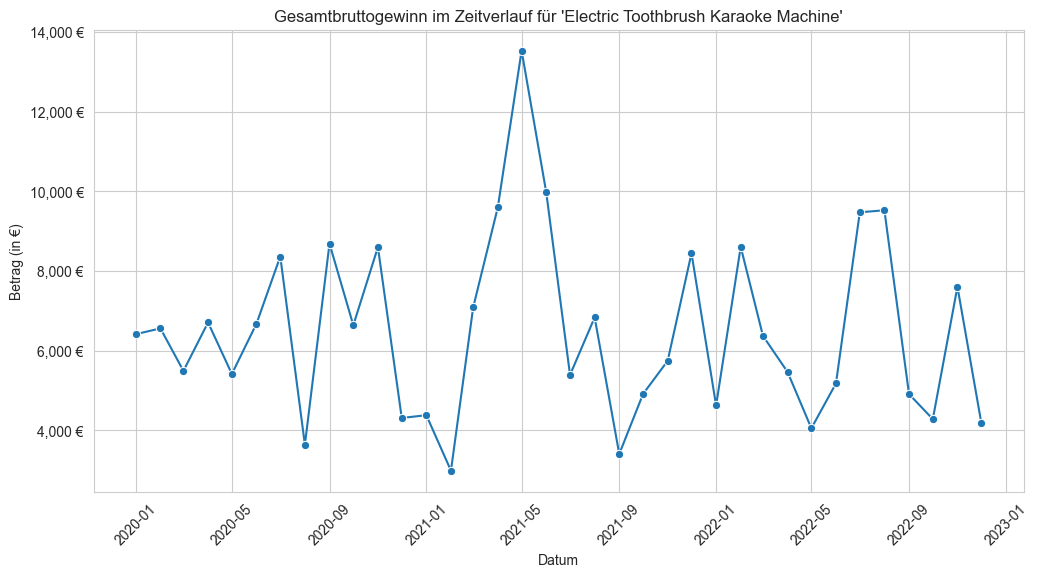

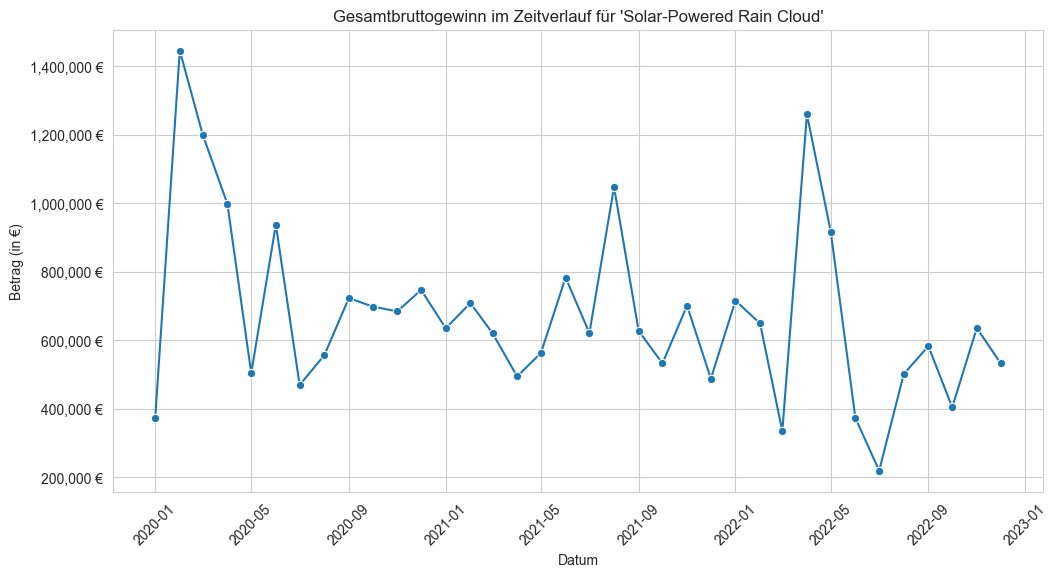

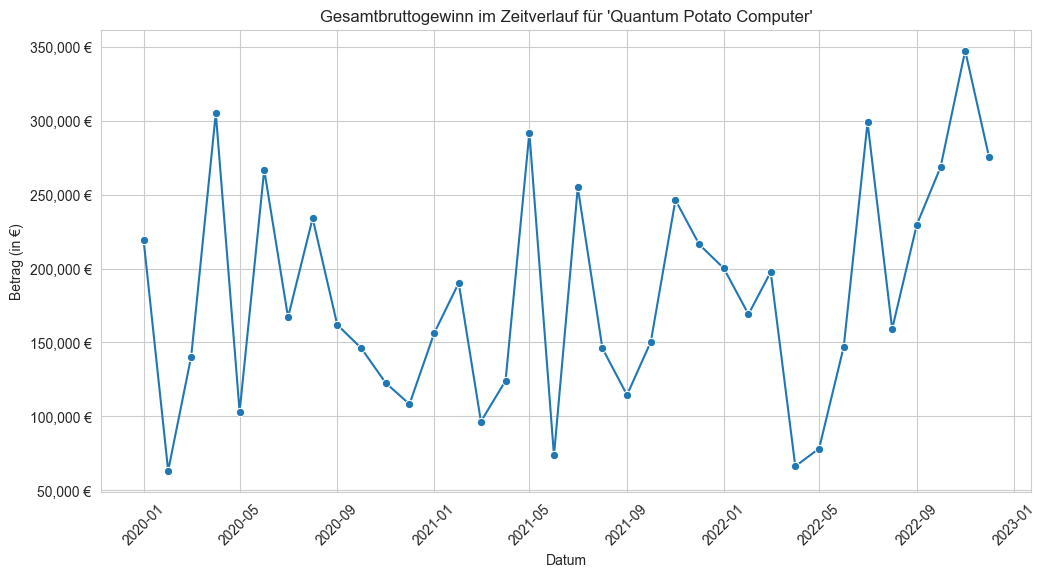

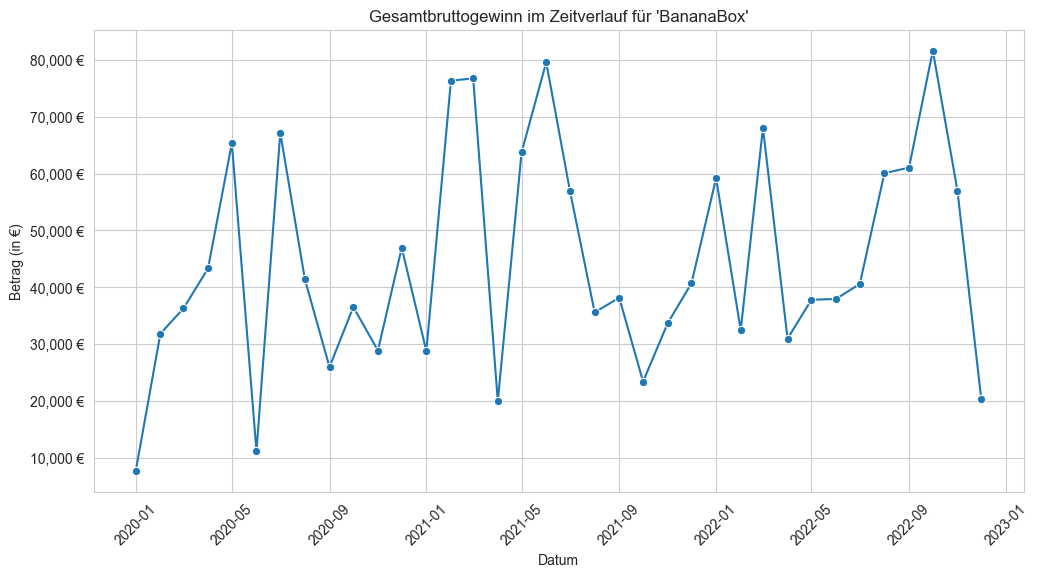

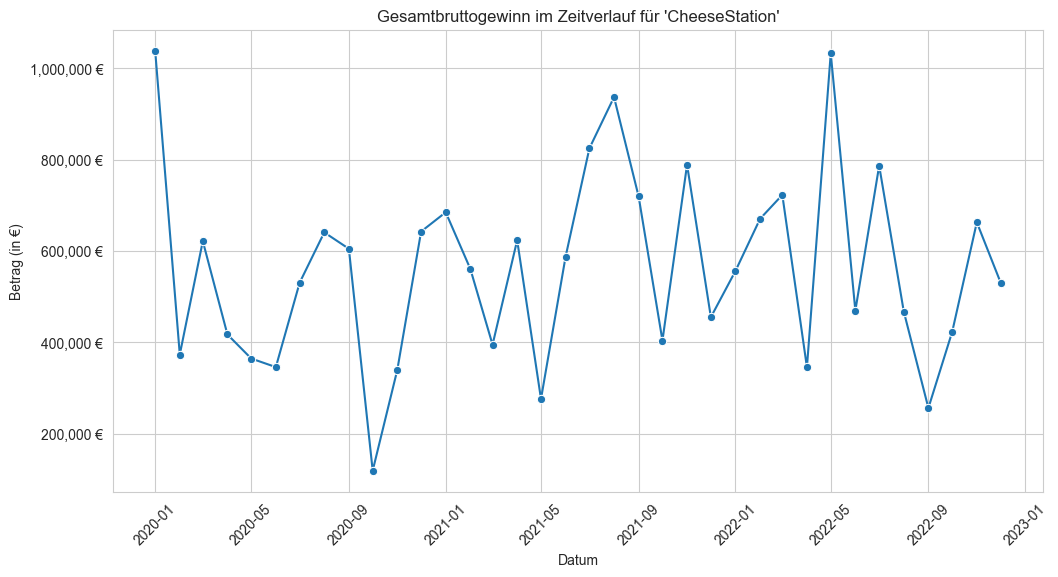

In [8]:
# Create line plots for each product

for product in products_list:
    product_data = product_date[product_date['Produkttyp Name'] == product]
    
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(data=product_data, x='Date', y='Gesamtbruttogewinn', markers=True, marker='o')
    
    plt.title(f"Gesamtbruttogewinn im Zeitverlauf für '{product}'")
    plt.xlabel('Datum')
    plt.ylabel('Betrag (in €)')
    plt.xticks(rotation=45)
    
    ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter_euro))
    
    plt.show()
    #plt.savefig(f'plot_3\\for_plot_1\\{product}.png')


In [9]:
product_date.head()

Year  Month                      Produkttyp Name  Gesamtbruttogewinn  \
0  2020      1                            BananaBox             7710.19   
1  2020      1               Bluetooth Banana Phone           100272.10   
2  2020      1                        CheeseStation          1038870.00   
3  2020      1  Electric Toothbrush Karaoke Machine             6412.38   
4  2020      1              Quantum Potato Computer           219542.56   

        Date  
0 2020-01-01  
1 2020-01-01  
2 2020-01-01  
3 2020-01-01  
4 2020-01-01

In [10]:
# Interactive Gesamtbruttogewinn im Zeitverlauf nach Produkt

fig = px.line(data_frame=product_date, x='Date', y='Gesamtbruttogewinn',
              markers=True,
              line_group='Produkttyp Name',
              color='Produkttyp Name'
              )

fig.update_layout(yaxis_tickformat=',.0f', yaxis_tickprefix='€',                  
                  title_text='Bruttogewinn im Zeitverlauf nach Produkt', 
                  title_x=0.45, 
                  title_font=dict(size=20, family='Arial'),
                  legend_title_text='Produkt',
                  )

fig.update_xaxes(title_text='Datum')
fig.update_yaxes(title_text='Betrag (in €)')

fig.show()

# filename = 'plot_3\\interactive1.html'  
# plot(fig, filename=filename)

In [11]:
# Animated Gesamtbruttogewinn im Zeitverlauf nach Produkt

fig = px.line(data_frame=product_date, x='Month', y='Gesamtbruttogewinn',
              markers=True,
              line_group='Produkttyp Name',
              color='Produkttyp Name',
              animation_frame='Year'
              )

fig.update_layout(yaxis_tickformat=',.0f', yaxis_tickprefix='€',                  
                  title_text='Bruttogewinn im Zeitverlauf nach Produkt<br>(Monat und Jahr)', 
                  title_x=0.45, 
                  title_font=dict(size=20, family='Arial'),
                  legend_title_text='Produkt',
                  )

custom_month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig.update_xaxes(title_text='Monat', type='category', tickvals=list(range(1, 13)), ticktext=custom_month_order)
fig.update_yaxes(title_text='Betrag (in €)',  
                 range=[0, 1_500_000],
                 #tickvals=list(range(0, 1_600_000, 200_000)), nticks=9
                 )

fig.show()

# filename = 'plot_3\\interactive2.html'  
# plot(fig, filename=filename)

In [12]:
# Interactive line plots
from plotly.offline import plot
import os

plots = []

# Create line plots for each product
for product in products_list:
    product_data = product_date[product_date['Produkttyp Name'] == product]
    
    fig = px.line(product_data, x='Date', y='Gesamtbruttogewinn', markers=True)
    
    fig.update_xaxes(title_text='Datum')
    fig.update_yaxes(title_text='Betrag (in €)')
    fig.update_layout(yaxis_tickformat='€,.0f')
    
    fig.update_layout(yaxis_tickformat=',.0f', yaxis_tickprefix='€',
                      title_text=f"Gesamtbruttogewinn im Zeitverlauf für '{product}' ", title_x=0.5, 
                      title_font=dict(size=20, family='Arial', color='red')
                      )
    # Find max and min value and Highlight the surrounding area
    max_value = product_data['Gesamtbruttogewinn'].max()
    max_index = product_data['Gesamtbruttogewinn'].idxmax()
    max_date = product_date.loc[max_index, 'Date']
    
    min_value = product_data['Gesamtbruttogewinn'].min()
    min_index = product_data['Gesamtbruttogewinn'].idxmin()
    min_date = product_date.loc[min_index, 'Date']
    
    fig.add_vrect(x0=max_date,
              x1=max_date,
              line_width=10,
              fillcolor='green',
              opacity=0.5
              )

    fig.add_vrect(x0=min_date,
              x1=min_date,
              line_width=10,
              fillcolor='red',
              opacity=0.2
              )
    
    plots.append(fig)

#Display the plots
for fig in plots:
    fig.show()

# save_path = 'C:\\Users\\User\\Desktop\\Data Analyst\\Aufgaben\\Visualisirung_Project\\plot_3\\for_plot_2'
# for idx, fig in enumerate(plots):
#         filename = os.path.join(save_path, f'interactive_plot_{idx}.html')
#         plot(fig, filename=filename)


In [13]:
# Interactive line plots

plots = []

# Create line plots for each product
for product in products_list:
    product_data = product_date[product_date['Produkttyp Name'] == product]
    
    fig = px.line(product_data, x='Month', y='Gesamtbruttogewinn', color='Year', markers=True)
    
    fig.update_xaxes(title_text='Monat', type='category')
    fig.update_yaxes(title_text='Betrag (in €)')
    fig.update_layout(yaxis_tickformat='€,.0f')
    
    fig.update_layout(yaxis_tickformat=',.0f', yaxis_tickprefix='€',
                      title_text=f"Gesamtbruttogewinn im Zeitverlauf für '{product}' pro Jahr", title_x=0.5, 
                      title_font=dict(size=20, family='Arial', color='red'),
                      legend_title_text='Jahr'
                      )
    
    plots.append(fig)

# Display the plots
for fig in plots:
    fig.show()
    
# save_path = 'C:\\Users\\User\\Desktop\\Data Analyst\\Aufgaben\\Visualisirung_Project\\plot_3\\for_plot_3'
# for idx, fig in enumerate(plots):
#         filename = os.path.join(save_path, f'interactive_plot_{idx}.html')
#         plot(fig, filename=filename)    
